<a href="https://colab.research.google.com/github/willismax/MediaSystem-Python-Course/blob/main/01.Intro-Python/EDA_Titanic_Survival_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 探索性資料分析 (EDA) 簡介
探索性資料分析（Exploratory Data Analysis, EDA）是一種初步分析資料的過程，目的是理解資料的基本特徵、結構、關係和分佈情況。EDA通常通過可視化圖表和統計摘要來幫助分析師發現資料中的模式、異常值和關鍵變數，為後續的資料建模和決策提供基礎。


## 為什麼需要進行EDA？
1. **理解資料**：熟悉資料的各種屬性及其分佈情況。
2. **發現異常**：識別資料中的異常值和錯誤。
3. **發現模式**：識別資料中的趨勢、相關性和重要變數。
4. **數據清理**：決定如何處理缺失值和異常值。
5. **指導模型構建**：選擇合適的特徵和模型。


## EDA的基本步驟
1. **數據讀取與基本檢視**
    - 讀取數據集
    - 檢視數據結構、類型和簡單統計量
2. **數據清理**
    - 處理缺失值
    - 處理異常值
    - 數據轉換
3. **數據可視化**
    - 單變數分析（直方圖、箱形圖等）
    - 雙變數分析（散佈圖、相關矩陣等）
    - 多變數分析（熱力圖、對角線圖等）
4. **特徵工程**
    - 創建新特徵
    - 特徵選擇與降維


## EDA案例：鐵達尼號生存分析
在這個案例中，我們將對鐵達尼號的乘客數據進行探索性資料分析。通過這個分析，我們將逐步了解數據的基本特徵、發現數據中的重要趨勢和異常情況，並為後續的分析和模型建構提供基礎。


In [1]:
!curl -o titanic.csv https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 60302  100 60302    0     0   221k      0 --:--:-- --:--:-- --:--:--  222k


In [2]:
# 步驟一：數據讀取與基本檢視
import pandas as pd

# 讀取鐵達尼號數據
data = pd.read_csv('titanic.csv')

In [3]:
# 檢視數據結構
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- PassengerId：乘客編號，獨特識別每一位乘客。
- Survived：是否生還，1 表示生還，0 表示未生還。
- Pclass：乘客艙等，1 表示頭等艙，2 表示二等艙，3 表示三等艙。
- Name：乘客姓名。
- Sex：乘客性別。
- Age：乘客年齡。
- SibSp：乘客在船上的兄弟姐妹和配偶數量。
- Parch：乘客在船上的父母及子女人數。
- Ticket：船票號碼。
- Fare：船票費用。
- Cabin：客艙號碼。
- Embarked：登船港口，C 表示Cherbourg，Q 表示Queenstown，S 表示Southampton。


In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# 步驟二：數據清理
# 1. 先 drop 掉 Embarked 缺失值（若同時要處理 Age 缺失，可改成 subset=['Age','Embarked']）
data = data.dropna(subset=['Embarked']).copy()

# 2. 計算中位數
age_median = data['Age'].median()
fare_median = data['Fare'].median()

# 3. 透過直接賦值填補缺失值，避免 chained assignment
data['Age']  = data['Age'].fillna(age_median)
data['Fare'] = data['Fare'].fillna(fare_median)

# 4. 移除不合理的票價（Fare <= 0），並再 copy 一次以確保後續操作安全
data = data[data['Fare'] > 0].copy()

# 5. 檢查結果
print(data.info())


<class 'pandas.core.frame.DataFrame'>
Index: 705 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  705 non-null    int64  
 1   Survived     705 non-null    int64  
 2   Pclass       705 non-null    int64  
 3   Name         705 non-null    object 
 4   Sex          705 non-null    object 
 5   Age          705 non-null    float64
 6   SibSp        705 non-null    int64  
 7   Parch        705 non-null    int64  
 8   Ticket       705 non-null    object 
 9   Fare         705 non-null    float64
 10  Cabin        181 non-null    object 
 11  Embarked     705 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 71.6+ KB
None


In [7]:
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57\_C7ccp7hbgSz3\_&export=download

import matplotlib

# 改style要在改font之前
# plt.style.use('seaborn')
matplotlib.font_manager.fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
matplotlib.rc('font', family='Taipei Sans TC Beta')

--2025-07-19 02:22:23--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 74.125.196.102, 74.125.196.113, 74.125.196.101, ...
Connecting to drive.google.com (drive.google.com)|74.125.196.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2025-07-19 02:22:23--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 173.194.217.132, 2607:f8b0:400c:c13::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|173.194.217.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M  40.6MB/s    in 0.5s    

2025-07-19 02:2

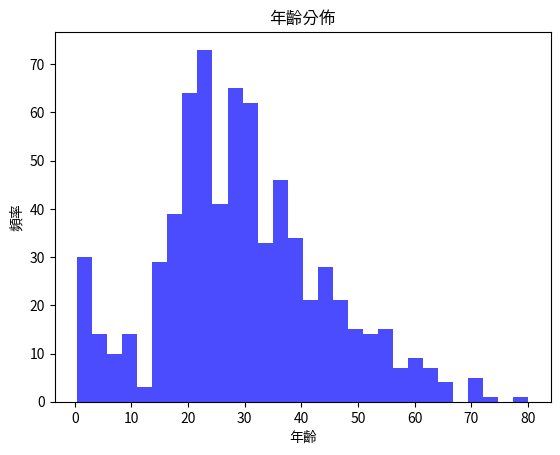

In [8]:
# 步驟三：數據可視化
import matplotlib.pyplot as plt
import seaborn as sns

# 直方圖：年齡分佈
plt.hist(data['Age'], bins=30, color='blue', alpha=0.7)
plt.title('年齡分佈')
plt.xlabel('年齡')
plt.ylabel('頻率')
plt.show()

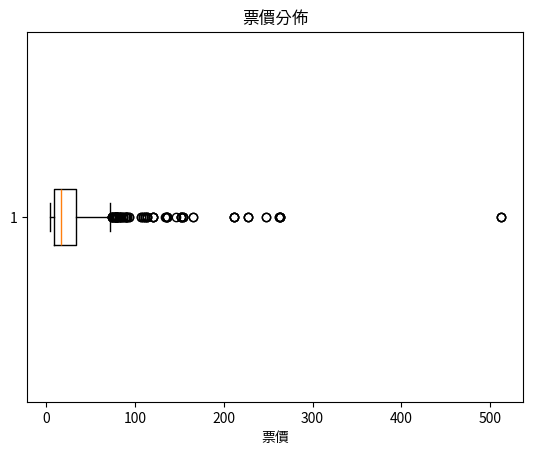

In [9]:
# 箱形圖：票價分佈
plt.boxplot(data['Fare'], vert=False)
plt.title('票價分佈')
plt.xlabel('票價')
plt.show()

> 如果你/妳會好奇這位票價最高的乘客是誰，恭喜妳很適合這門課程。請持續追問數據，並且找到第一手報導資料(第一性原理)，希望能找到比[這篇](https://www.encyclopedia-titanica.org/titanic-survivor/annie-moore-ward.html)更可信任的文章。

In [10]:
# prompt: 票價最高的人是否生存

# 找出票價最高的乘客
max_fare_passenger = data.loc[data['Fare'].idxmax()]

# 檢查該乘客是否生還
survived_status = max_fare_passenger['Survived']

if survived_status == 1:
    print("票價最高的乘客生還了。")
else:
    print("票價最高的乘客沒有生還。")

# 也可以直接查看該乘客的 Survived 值
print(f"票價最高的乘客的生還狀態 (1=生還, 0=未生還): {survived_status}")
print(f"票價最高的乘客資訊:\n{max_fare_passenger}")

票價最高的乘客生還了。
票價最高的乘客的生還狀態 (1=生還, 0=未生還): 1
票價最高的乘客資訊:
PassengerId                 259
Survived                      1
Pclass                        1
Name           Ward, Miss. Anna
Sex                      female
Age                        35.0
SibSp                         0
Parch                         0
Ticket                 PC 17755
Fare                   512.3292
Cabin                       NaN
Embarked                      C
Name: 258, dtype: object


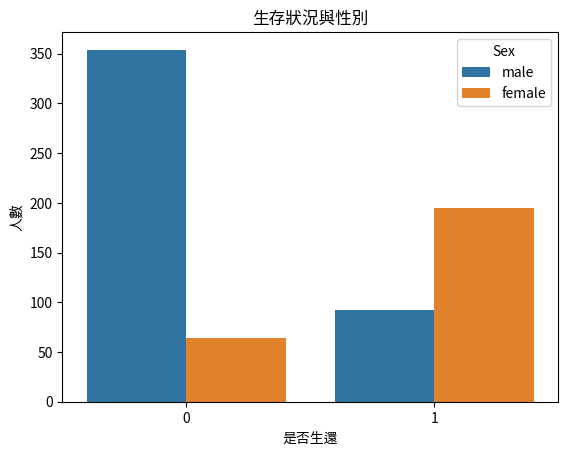

In [11]:
# 雙變數分析：生存狀況與性別
sns.countplot(x='Survived', hue='Sex', data=data)
plt.title('生存狀況與性別')
plt.xlabel('是否生還')
plt.ylabel('人數')
plt.show()

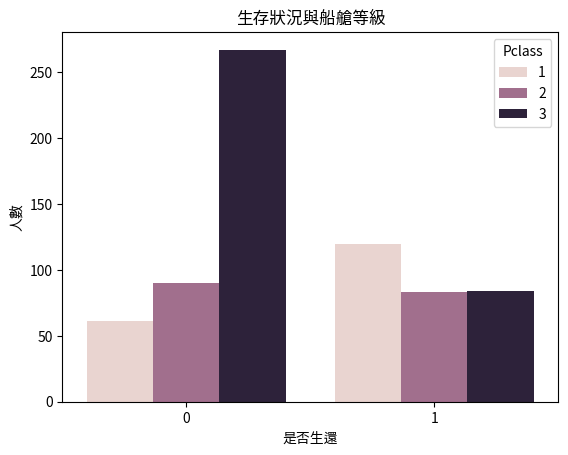

In [12]:
# 雙變數分析：生存狀況與船艙等級
sns.countplot(x='Survived', hue='Pclass', data=data)
plt.title('生存狀況與船艙等級')
plt.xlabel('是否生還')
plt.ylabel('人數')
plt.show()

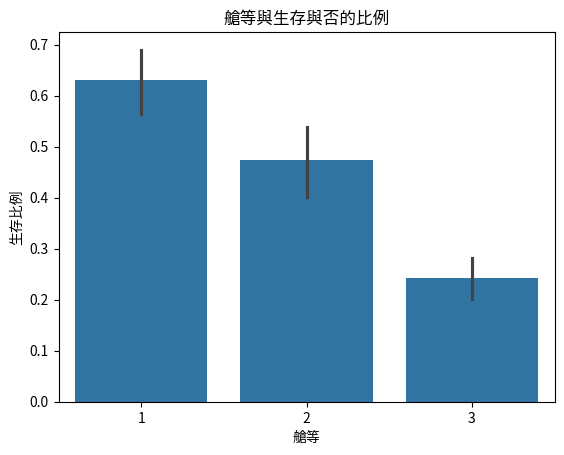

In [ ]:
# prompt: 艙等與生存與否的比例繪圖

import matplotlib.pyplot as plt
import seaborn as sns

# 艙等與生存與否的比例繪圖
sns.barplot(x='Pclass', y='Survived', data=data)
plt.title('艙等與生存與否的比例')
plt.xlabel('艙等')
plt.ylabel('生存比例')
plt.show()


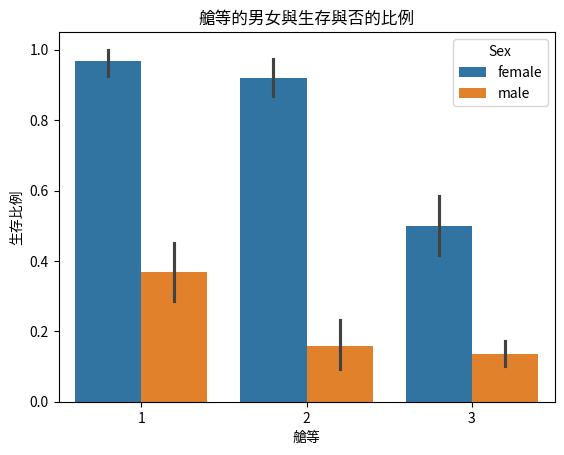

In [ ]:
# prompt: 艙等的男女與生存與否的比例繪圖

import matplotlib.pyplot as plt
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=data)
plt.title('艙等的男女與生存與否的比例')
plt.xlabel('艙等')
plt.ylabel('生存比例')
plt.show()


### 請嘗試用妳/你的想法持續追問，探索數據...

## 結論與後續工作
通過這個探索性資料分析，我們對鐵達尼號乘客數據有了初步的了解。接下來，我們將基於這些發現進行更深入的數據分析和建模工作，以便為預測乘客生存機率提供有力支持。


- 可以給LLM的Prompt:`請先做EDA，再依據生存者聚類為3類，分別解釋其特徵。`

## 參考資料
- [Pandas 官方文件](https://pandas.pydata.org/pandas-docs/stable/)
- [Matplotlib 官方文件](https://matplotlib.org/stable/contents.html)
- [Seaborn 官方文件](https://seaborn.pydata.org/)
